In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Importing all the necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
from PIL import Image
import os
import gradio as gr
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Importing the important libraries for Transforming image labels
from sklearn.preprocessing import LabelBinarizer
import pickle

# Importing backend from keras
from keras import backend as K
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.layers.convolutional import MaxPooling2D

# Importing formating tools
from termcolor import colored

## creating a variable to print the guide to the notebook functionality after all the files are installed
welcomer = "WELCOME!"
welcome = welcomer.replace("WELCOME!", colored("WELCOME!", "green", attrs=["bold"]))
starter = "This is the Plant Disease Predictor Data Science proud project by Marveriks"
start = starter.replace("Marveriks", colored("Marveriks", "green", attrs=["bold"]))
guide = "If you dont already have the data locally, Please *UNCOMMENT* and run the 3rd and 4th cells to get the Data. "
info = "It might take a while to get the data after you run"
intro = "Run the cells consecutively without jumping foward to avoid unecessary *ERRORS*"
text = "Made with Love by Marveriks"
end = colored("Made", "green", attrs=["bold"]) + " " + \
                 colored("with", "yellow", attrs=["bold"]) + " " + \
                 colored("Love", "red", attrs=["bold"]) + " " + \
                 colored("by", "yellow", attrs=["bold"]) + " " + \
                 colored("Marveriks", "green", attrs=["bold"])

# Generating the guide
print(welcome)
print(".......................................................")
print(start)
print(".......................................................")
print(guide)
print(info)
print(intro)
print()
print()
print(end)

WELCOME!
.......................................................
This is the Plant Disease Predictor Data Science proud project by Marveriks
.......................................................
If you dont already have the data locally, Please *UNCOMMENT* and run the 3rd and 4th cells to get the Data. 
It might take a while to get the data after you run
Run the cells consecutively without jumping foward to avoid unecessary *ERRORS*


Made with Love by Marveriks


In [2]:
## Declaring various variables to be used during the training process

EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
width=256
height=256
depth=3

In [3]:
# installing and importing the opendatasets so as to use it retrieve datasets from kaggle
# !pip install opendatasets --upgrade --quiet
# import opendatasets as od

In [4]:
# # Downloading the data from kaggle
# kaggle_link = 'https://www.kaggle.com/datasets/emmarex/plantdisease'
# od.download(kaggle_link, force=True)

In [5]:
# function used converting images to an array
def imgarray(img_dir):
    try:
        image = cv2.imread(img_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return imgarray(image)
        else :
            return np.array([])
    except Exception as e:
        print(e)
        return None

In [6]:
## In this cell I will be declaring the dataset directory path denoted by "data_dir"
data_dir = "./plantdisease"

In [7]:
## A for loop to generate an array list of labels and images

image_list = []
label_list = []

try:
    print("[INFO] Loading images ...")
    root_dir = os.listdir(data_dir)

    for plant_folder in root_dir:
        if plant_folder == ".DS_Store":
            continue

        plant_disease_folder_list = os.listdir(os.path.join(data_dir, plant_folder))

        for disease_folder in plant_disease_folder_list:
            if disease_folder == ".DS_Store":
                continue

            print(f"[INFO] Processing {disease_folder} ...")
            plant_disease_image_list = os.listdir(os.path.join(data_dir, plant_folder, disease_folder))

            for image in plant_disease_image_list[:200]:
                if image == ".DS_Store":
                    continue

                image_directory = os.path.join(data_dir, plant_folder, disease_folder, image)
                if image_directory.endswith((".jpg", ".JPG")):
                    try:
                        img = Image.open(image_directory)
                        image_list.append(img)
                        label_list.append(disease_folder)
                        print(f"[INFO] Image loaded: {image_directory}")
                    except Exception as e:
                        print(f"Error loading image: {image_directory} - {e}")

    print("[INFO] Image loading completed")

except Exception as e:
    print(f"Error: {e}")

[INFO] Loading images ...
[INFO] Processing Pepper__bell___Bacterial_spot ...
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\006adb74-934f-448f-a14f-62181742127b___JR_B.Spot 3395.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\01613cd0-d3cd-4e96-945c-a312002037bf___JR_B.Spot 3262.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\0169b9ac-07b9-4be1-8b85-da94481f05a4___NREC_B.Spot 9169.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\018e494e-d2eb-468b-9d02-40219d9f4921___JR_B.Spot 9045.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\01940b6d-7dea-4889-

[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\186f840e-086b-49fa-97a7-18628c6293f0___JR_B.Spot 3136.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\188f102a-6f64-4180-9d38-f98b61aaec60___JR_B.Spot 9014.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\18df58d7-c6ac-48e5-8cb0-596b70252a8e___NREC_B.Spot 9153.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\197e7e21-9ddb-4fbe-a87e-2885a14c29d5___JR_B.Spot 9035.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\197fdd19-46d1-46f7-8e79-aa9545f76ff0___JR_B.Spot 9000.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\19a868e4-5e24-43e8-b61b-a41022340f8e___NREC_B.Spot 1886.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\1a1af0c4-9e4a-4158-b982-f81d487a3b68___NREC_B.Spot 9148.JPG
[INFO] Image loaded: ./plantdisease

[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\2bb75692-d488-406d-bce0-c7eab42557c5___NREC_B.Spot 1922.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\2becae93-578d-44c6-8e74-056e59d15c8e___JR_B.Spot 3396.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\2c13c040-2ce6-47c5-899c-8146cd774f79___NREC_B.Spot 1976.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\2c4a898a-9812-423b-bd8a-419a09699270___JR_B.Spot 8853.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\2c8e565d-14be-4cbe-8873-2aa25a86b98c___JR_B.Spot 8903.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\2ca511f9-951d-4f34-89af-25fd1a609584___NREC_B.Spot 9138.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___Bacterial_spot\2cdea224-6f10-4a3d-a3f1-1debd1a42640___JR_B.Spot 8926.JPG
[INFO] Image loaded: ./plantdisease

[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\0984b7ed-2a64-40fe-b0fa-ff440b0fc8e4___JR_HL 8600.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\09c7fa21-c544-4a90-86ec-c56d3996602d___JR_HL 8578.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\0a3f2927-4410-46a3-bfda-5f4769a5aaf8___JR_HL 8275.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\0ade14b6-8937-43ea-93eb-98343af6bae7___JR_HL 8026.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\0b76f650-27cf-4b62-b3ad-c97d81e0db0c___JR_HL 8554.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\0b796b7a-dfc8-47f7-9970-8373263c6408___JR_HL 5948.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\0ba474dd-0cfd-4fd2-a58c-8e3d18dbe7c3___JR_HL 8395.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\0bb97c36-159d-4ee2-8b06-1fbf3f533af5___JR_HL 8

[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\19094b2f-e170-4634-967e-31a6cf77c46b___JR_HL 8682.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\190c892d-83a8-42f5-ada3-aaad39d1e7b1___JR_HL 7561.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\193e6efe-152b-41ed-b77f-4b9268342162___JR_HL 8341.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\19f9585d-868d-42e8-9d63-cae9fe345bd4___JR_HL 5839.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\1a1a389d-f186-4481-8a5c-b8c6f864ad7f___JR_HL 8649.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\1a482d0c-d3a9-4e79-b412-f2288dc5067f___JR_HL 5852.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\1a629a1c-1000-48ce-a7d8-2064aa7e24ae___JR_HL 6001.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Pepper__bell___healthy\1a93f310-cd75-4af6-96d3-690180b4542a___JR_HL 5

[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Early.B 7562.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\0267d4ca-522e-4ca0-b1a2-ce925e5b54a2___RS_Early.B 7020.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\028f9b73-142f-499a-

[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\1af20ff8-980d-4912-b337-804b09667de3___RS_Early.B 7392.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\1b0a2898-00b9-4a12-b4dc-a89b77b9e8b7___RS_Early.B 6928.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\1b4304a9-88c2-4c09-bfea-830fa162a35a___RS_Early.B 7188.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\1c42eae7-29c8-42fd-b05a-9b8255790f6f___RS_Early.B 7719.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\1c4e0445-375a-4c5d-b6fd-6123d22f009f___RS_Early.B 7972.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\1ca9e3ba-e029-48bf-b207-e8cb3546f953___RS_Early.B 7978.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\1cb05d87-027d-4bf0-b5c4-4c1a57896ac6___RS_Early.B 7936.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\1d038d64-7f3c-4b4d-

[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Early_blight\34d7e068-10e6-4ea0-8547-c90937fccbbc___RS_Early.B 8198.JPG
[INFO] Processing Potato___healthy ...
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\03da9931-e514-4cc7-b04a-8f474a133ce5___RS_HL 1830.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\04481ca2-f94c-457e-b785-1ac05800b7ec___RS_HL 1930.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\046641c1-f837-49eb-b5f2-4109910a027c___RS_HL 1878.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\07dfb451-4378-49d1-b699-33a5fc49ff07___RS_HL 5399.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\0b3e5032-8ae8-49ac-8157-a1cac3df01dd___RS_HL 1817.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\0be9d721-82f5-42c3-b535-7494afe01dbe___RS_HL 

[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\b925ad3e-fc49-497d-a6eb-115f0de20800___RS_HL 4170.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\b9ea902d-e557-4fa5-893b-39a7a57c0121___RS_HL 1893.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\bb04f738-1848-4dda-8834-384a48b335cd___RS_HL 1765.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\bb328d40-e4e6-4b84-a92a-e7cb3922c19d___RS_HL 1829.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\bde33d08-678c-4f84-b80e-fcb986a9a446___RS_HL 5415.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\bf2bffbb-cd8f-4d36-bd58-847808397c75___RS_HL 1786.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\c07db642-c675-4066-99b6-56bc8207fb37___RS_HL 4164.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___healthy\c3caa84b-6078-4489-80ac-919d92d25ff7___RS_HL 1772.JPG
[INFO] Image loaded: ./plantdisease\Plan

[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\08ddae0c-5328-4183-b16e-c980f197e471___RS_LB 2845.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\09287918-9f73-4707-823f-f4331f5114a3___RS_LB 2604.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\09a215a1-a539-4635-a27f-232229ff11f4___RS_LB 4529.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\09a30eff-d386-456d-a6ce-ead7c0d6235b___RS_LB 5068.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\09fa42e4-1736-494e-8c46-50c6900586d6___RS_LB 5212.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\0acdc2b2-0dde-4073-8542-6fca275ab974___RS_LB 4857.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\0b092cda-db8c-489d-8c46-23ac3835310d___RS_LB 4480.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\0b2bdc8e-90fd-4bb4-bedb-485502fe8a96___RS_LB 4906.JPG
[INFO] I

[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\2657bf2b-c03e-4ec6-bf6a-4afe8645acec___RS_LB 3110.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\265e32dc-44f3-40f8-8c5d-8bc223dd0f52___RS_LB 4859.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\267d6db0-95db-4945-a6b0-bf05b11ef8ff___RS_LB 3231.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\2717d9f6-68a9-44ca-b290-0311a5356621___RS_LB 4564.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\27f1b297-f65a-458f-80d9-0046fa4c8c11___RS_LB 4332.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\2846161c-9ac0-4ef3-b563-aee344dac80d___RS_LB 4851.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\289cbc85-4659-4db9-95b3-06b14fa36216___RS_LB 3857.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Potato___Late_blight\28cbad12-8d41-4d36-a6df-db0d35ee1ce0___RS_LB 2922.JPG
[INFO] I

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\06f23987-e01b-40dc-98ef-a5b33e86bc90___UF.GRC_BS_Lab Leaf 0308.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\070228e2-ba4e-4de8-813b-074e51ed6f5a___UF.GRC_BS_Lab Leaf 0661.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\07238109-52ed-4369-b16c-6f5844858b81___UF.GRC_BS_Lab Leaf 0447.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\07246956-b38c-4d28-acec-85d032ba989e___UF.GRC_BS_Lab Leaf 0278.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\072f9c7d-c296-49d9-a432-6ec9448cab2a___GCREC_Bact.Sp 3558.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\0740bf94-09c3-4718-8375-6ceed7db97a3___GCREC_Bact.Sp 3628.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\07458546-6893-49c8-b94f-edde706b19fa___GCREC_Bact.Sp 3835.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\12159ce5-93ff-4ef3-b1ca-0bf130278818___GCREC_Bact.Sp 3565.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\12168e10-ea77-4d6b-841e-bfe48e141cee___GCREC_Bact.Sp 6085.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\122e4db5-bfc6-44b2-b7c5-bf05d040ca79___GCREC_Bact.Sp 5782.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\12440deb-4c37-42ed-a6ea-dcb018b52620___GCREC_Bact.Sp 3436.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\129f7d8d-d261-4aa6-b6ef-55a37851ac3e___UF.GRC_BS_Lab Leaf 0380.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\12cb9794-7459-488f-820e-f86a3d6b8a3a___GCREC_Bact.Sp 3119.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacterial_spot\12e9560a-01a5-4d97-a911-409c11cd0301___GCREC_Bact.Sp 3117.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Bacteria

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\0f03a09c-aa48-4d51-95e1-752c466c3742___RS_Erly.B 6413.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\0f065614-a53a-4c83-9d29-5d3e4ab5b41d___RS_Erly.B 7676.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\0f111718-a749-42cf-9495-412f4b51acf0___RS_Erly.B 7482.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\0f12e22b-49a9-4d9a-84bc-76bb86ed2a14___RS_Erly.B 9572.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\0f1fb081-c715-414e-aa64-2c398ba6c320___RS_Erly.B 6382.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\0f4e562d-77ee-47c2-8ee9-34b391bc0fc3___RS_Erly.B 9434.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\0f7a2408-9c26-4ff9-bee5-2bfcd91a11f7___RS_Erly.B 9440.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\0fbc786c-62a7-44f3-8db8-2649809bf1aa___RS_

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\25b96058-36c9-4213-bb16-088e76cb30b1___RS_Erly.B 9417.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\25cc64d3-0ea1-4082-9b2a-bcaee3056580___RS_Erly.B 9602.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\2606a4ae-7b2f-4fd6-a561-fc9dce2ffc02___RS_Erly.B 9570.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\264bc13b-2bcd-40f8-ae25-23aef0ccdc64___RS_Erly.B 7589.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\265940d8-b4e9-446f-b977-3cbd9ee4f789___RS_Erly.B 9595.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\268590f4-68f6-4de9-968e-a7465b377db4___RS_Erly.B 7614.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\26b721c9-94fd-4e19-bb7e-521238eb8a1b___RS_Erly.B 9380.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Early_blight\26e2e7aa-800c-421b-92e8-3e20c5f5757e___RS_

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\0a9986e6-b629-4ff5-8aab-7488ea9b935b___RS_HL 9704.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\0aacdad5-c9b9-4309-96e3-0797bbed1375___RS_HL 9836.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\0b330273-890c-4995-af72-cba070fc0061___GH_HL Leaf 312.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\0b5cfce2-38fd-4984-8926-2d2911c48490___RS_HL 9733.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\0bfe260c-a71e-474e-bfb1-78f1e5ca5698___RS_HL 0497.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\0c3eaf2d-8203-441d-9248-1c64e00b5b8b___RS_HL 0018.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\0c4b06d5-4053-44fc-99b6-504934fdd3a9___GH_HL Leaf 199.1.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\0c8c9c80-b7e0-47a7-81d3-b5a2174e545d___GH_HL Leaf 496.1.JPG
[INFO] Image loaded: ./plantdisease\Plan

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\1971e05b-fc5e-40c1-a4ff-c6a4c746693f___GH_HL Leaf 237.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\19787f8b-a78e-4cf2-8fb2-3aae59b20c47___RS_HL 0456.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\199f4f32-6e91-4031-b861-bac1abe3452a___RS_HL 9763.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\19e31197-5f6d-4925-975c-884bd4a94bfe___RS_HL 0291.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\1a02fa87-a194-482e-b4ac-8dec2064d793___RS_HL 0022.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\1a0a5292-5e63-4afa-8611-38eef316f1e9___GH_HL Leaf 477.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\1a0b9a32-3993-44e4-879f-338cd6e45a09___GH_HL Leaf 178.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_healthy\1a0c4408-634e-4bd5-948d-e73ca5572976___RS_HL 0146.JPG
[INFO] Image loaded: ./plantdisease\PlantVil

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\04d8f472-b6ba-4bf7-82eb-a643937af9aa___GHLB2 Leaf 113.3.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\04da342d-5952-4f2f-b19c-14cdc7fcb07b___GHLB2 Leaf 8716.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\050ddb3f-1eb7-4905-8fa3-fc537dc50b7a___GHLB2 Leaf 9042.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\0524e8c4-56d9-41e2-b22d-33f22950ff93___RS_Late.B 5320.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\052ec825-37a3-4467-a5ea-2e0601c29fbd___RS_Late.B 6786.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\0545d961-8c4c-43ee-9574-e05d7682a99f___GHLB2 Leaf 8631.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\0566e4e3-675b-4289-9e36-ad199448975b___GHLB2 Leaf 161.2.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\05a34df9-4fc9-460a-b675-3c4a37cfdf4c___GHLB

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\1159051e-1278-4b35-929c-e26b963d048f___GHLB_PS Leaf 8.1 Day 16.jpg
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\116c7fc2-8443-40b7-a8c0-9619e3e46f08___GHLB2 Leaf 8797.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\117a7f38-eaa6-4f88-b892-33e2a66d77d5___RS_Late.B 5129.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\118be78d-e498-427f-8399-add5e8ab1b15___GHLB2 Leaf 149.3.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\11b2caf9-a56c-4d3e-bea4-a5d00affd161___RS_Late.B 6140.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\12044cb0-2591-4696-8a85-3d3f319f4f6a___GHLB2 Leaf 8977.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\121097dd-b0cb-436b-9b2f-7dab30c86872___GHLB_PS Leaf 37.1 Day 13.jpg
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Late_blight\12125c80-42e3-4970-bb92-524

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\0bb34c9b-ecf7-4fb1-8ee1-098bccdcdaae___Crnl_L.Mold 6522.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\0bc63b4c-e41b-4338-a8ac-af664048fdbb___Crnl_L.Mold 6913.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\0bc8fe4f-f614-43ce-bb2f-e3c0ef79f148___Crnl_L.Mold 8907.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\0c0debed-e807-4236-a2e3-d9b72f54367f___Crnl_L.Mold 6899.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\0ced0bae-d224-43f5-8fd7-072c7cbd8f77___Crnl_L.Mold 9161.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\0d54c850-da9a-498d-a636-ddeac067fd7e___Crnl_L.Mold 6746.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\0db4cbf4-fa94-42c8-8bf5-90114281c569___Crnl_L.Mold 8681.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\0ddf82ad-9004-4913-ac9c-d00333d7c858___Crnl_L.Mold 7

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\272c102c-6c18-4e3a-a64c-078bce56bde1___Crnl_L.Mold 6889.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\273b19fa-2701-4679-a994-8a37040ac343___Crnl_L.Mold 6577.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\27867fa8-39ae-4480-936e-1adcdceeb7fb___Crnl_L.Mold 6924.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\27c4fc3e-760a-4d3c-8552-bb5ca4eab3d8___Crnl_L.Mold 6781.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\27e8bb41-97a2-44b7-95e2-fd3b2e99f317___Crnl_L.Mold 7064.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\27fb67df-f3f0-4e27-9fa3-6b7ee21515f1___Crnl_L.Mold 8934.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\2847f847-3048-487d-ae4f-c45e44d04d85___Crnl_L.Mold 8878.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Leaf_Mold\2857df1b-3a91-46d2-ab63-926b329b4a28___Crnl_L.Mold 7

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\002533c1-722b-44e5-9d2e-91f7747b2543___Keller.St_CG 1831.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\0025c401-7785-49c5-8bef-780a8a0d3652___Matt.S_CG 2694.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\006c018a-bb21-4a24-b1ff-d8b2864a7354___Matt.S_CG 6192.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\009bb542-f0c0-40f2-98a7-f547c5adec45___Matt.S_CG 1355.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\009ce7ca-77de-4e4e-9f59-bec9162df779___Matt.S_CG 7403.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\00f16858-f392-4d9e-ad9f-efab8049a13f___JR_Sept.L.S 8368.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\015c2613-fb1c-4f31-88f1-c7e5be9ddc97___JR_Sept.L.S 8431.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septor

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\0ea8a7c0-74f4-404b-81f4-233e501dab60___Matt.S_CG 6731.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\0ebf0c98-aeb9-4630-afa0-0c9a2dc32995___Matt.S_CG 6233.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\0edb366d-1253-4498-a05a-8f666405edc6___Matt.S_CG 7862.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\0ef9804e-d695-40e4-8950-08551255fa05___JR_Sept.L.S 8540.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\102edb0a-780d-4b7e-b31e-c06e5e85211f___Matt.S_CG 2588.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\10361c83-4549-4865-b995-5f27c884e8e2___Matt.S_CG 6096.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\10738d0a-42a6-4f9f-aab6-d2676eb89236___Matt.S_CG 1692.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_le

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\1c7e9ef5-bf97-4e53-b6c1-7fd148d043d5___Matt.S_CG 6482.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\1c85a28a-19b9-487a-b9e4-0e6d7c08e4a8___Keller.St_CG 1771.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\1c94b8af-21b7-43b5-b6ff-a5f7a3ad0a6e___Matt.S_CG 1727.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\1c9a19ab-15e6-4af9-9130-603a329f356e___Matt.S_CG 7520.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\1cffba8e-40e0-43ce-914b-c184feb2cb2e___Matt.S_CG 7401.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\1d2e1e46-0835-4f07-bebe-edf37ade1a12___Matt.S_CG 6363.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_leaf_spot\1d3dc5a7-5c0a-4852-8210-b06eede5d40a___Matt.S_CG 6071.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Septoria_l

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\08f0fd0e-d4b1-400d-9df1-2d61d24c95f0___Com.G_SpM_FL 9397.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\093aecee-3211-4aad-8f09-45ccdc92eeb6___Com.G_SpM_FL 9040.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\09434fa9-0733-4ef5-9cc3-db29d1e3a480___Com.G_SpM_FL 1425.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\0956a6ef-18ce-4a82-a9a1-ca41d07ae13f___Com.G_SpM_FL 9371.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\09904a06-b32f-4db4-963f-c8dacfff6b9e___Com.G_SpM_FL 8456.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\09dce947-bb58-46cc-bd33-5a5e75ee07f4___Com.G_SpM_FL 9019.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spo

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\15cbb6e3-420d-464c-a2e0-12ffffb68cd2___Com.G_SpM_FL 9328.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\15f6c5bf-d689-4ffd-a27f-821c0517224c___Com.G_SpM_FL 1591.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\16826b8c-034f-4db2-bd96-db82b5b26c67___Com.G_SpM_FL 1551.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\1687e54f-583f-4ecb-9b63-c36ea438baba___Com.G_SpM_FL 9577.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\16ce6128-f485-4bbf-9cf5-8cab2e872dbe___Com.G_SpM_FL 9342.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spotted_spider_mite\16d4c4ec-274a-4b5e-bfa3-6a40f90b46da___Com.G_SpM_FL 9465.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato_Spider_mites_Two_spo

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\003a5321-0430-42dd-a38d-30ac4563f4ba___Com.G_TgS_FL 8121.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\0044d10f-7062-4655-8abd-9fffc5b2f152___Com.G_TgS_FL 7908.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\007ec913-8cfe-43ed-b458-f041a17266ae___Com.G_TgS_FL 9844.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\00854623-ba28-446d-a1d5-03c0ae3f99d9___Com.G_TgS_FL 7949.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\0118c27a-f34a-41e1-8b2f-d2c564f83c5c___Com.G_TgS_FL 0013.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\0118ed61-b135-45be-ad81-7e2d54203be4___Com.G_TgS_FL 8241.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\0197df47-a9cb-4b6c-b7

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\12043f51-8708-4543-ae7b-1a4e97376ade___Com.G_TgS_FL 8244.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\1220c0aa-f6e0-4b7d-ab11-44e73b0b10f4___Com.G_TgS_FL 9863.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\122577a3-0f69-45f0-9e73-48528f9dea1c___Com.G_TgS_FL 8179.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\124f6318-c33b-4344-babd-d8f16be507c1___Com.G_TgS_FL 0857.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\12c492b4-fb79-47c4-9bdd-720c1361a355___Com.G_TgS_FL 8224.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\12d24a09-d4e7-419c-8a19-b0efa059c3ec___Com.G_TgS_FL 1020.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\13171789-e847-42d1-ac9b-cfeecb94bf82___Com.G_TgS_FL 1038.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\1321a438-2e26-42d0-81

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\252b0f54-737e-4622-960c-2196803b6a00___Com.G_TgS_FL 0974.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\258b3066-17f2-4cd0-967b-8c1f7b2bedf4___Com.G_TgS_FL 9860.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\25e2f100-2c7b-4c06-a5f2-0bce10499905___Com.G_TgS_FL 1096.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\25f5dde8-4c91-46d6-b2e9-b818a12e3618___Com.G_TgS_FL 0822.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\26150f8e-52df-4b1e-b37c-01f3cfc8d746___Com.G_TgS_FL 9958.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Target_Spot\2615bf45-0d9a-4b11-8eab-25bb5b86937d___Com.G_TgS_FL 1053.JPG
[INFO] Processing Tomato__Tomato_mosaic_virus ...
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\000ec6ea-9063-4c33-8abe-d58ca8a88878___PSU_CG 2169.JPG
[INFO] Image loaded: ./plantdisease\Pl

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\2df35be7-ba8c-4ff6-a608-f7c481c59ede___PSU_CG 2202.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\2e03280e-123a-4231-a73a-652c57338137___PSU_CG 2053.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\2f240e5e-cbb9-406a-98aa-12028411429c___PSU_CG 2123.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\2f8c596f-15d8-4524-b527-8617329c1819___PSU_CG 2146.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\2fa22081-5533-4b18-9a8f-671f210db37e___PSU_CG 2092.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\2ffd2426-1463-48aa-a3bb-622ece568219___PSU_CG 2137.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\3117475d-3948-45a5-b2c7-630efb8bfab8___PSU_CG 2333.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\6f020ba1-d1a7-41f4-95da-4ca61471b2e6___PSU_CG 2059.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\6f341314-6084-4784-a3ba-0a9bdc944366___PSU_CG 2372.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\71aa5741-6923-4593-9a23-bc7f58dc40b2___PSU_CG 2183.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\71ed39c0-f601-4913-aaf0-7719b3cc75b2___PSU_CG 2152.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\72124620-ccfa-40d7-a518-a0257def7afc___PSU_CG 2335.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\7395917b-a4d4-4156-9bd8-55b4a4dc5022___PSU_CG 2207.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus\739ccd84-1026-4871-8f5c-2320c205fe2e___PSU_CG 2399.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_mosaic_virus

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\02cee277-e491-468a-8ffc-f64227d33b4c___YLCV_GCREC 2197.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\02d5be6b-eafd-4063-9ba5-4a01901bce82___UF.GRC_YLCV_Lab 03004.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\02dc4f14-66a1-4db1-8367-96413b7187d5___YLCV_GCREC 2151.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\02dec71c-6051-4b2c-8a08-24efbe306766___YLCV_GCREC 5340.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\02dfcd5a-d665-4d4a-a12d-c64682647190___UF.GRC_YLCV_Lab 01991.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\02e3b67b-0cf3-4624-a0f6-61f5abd2fbe4___YLCV_NREC 0154.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\03028d07-fabb-4524-af78-89

[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\079971f3-8298-40ba-b8a5-c389784f5118___YLCV_GCREC 2654.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\07a69b1e-1b70-44cc-ad96-24d4200be7d3___UF.GRC_YLCV_Lab 02218.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\07aa5223-ed3c-48a9-83e7-bd76a110f941___UF.GRC_YLCV_Lab 03119.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\07aadcd9-330a-4600-a4d7-a638498c022d___YLCV_GCREC 2291.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\07ad6ef7-f12c-4c74-b3d2-60e57e7db652___YLCV_GCREC 2195.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\07b76767-2537-474e-8fba-8c8dd29537a0___UF.GRC_YLCV_Lab 09587.JPG
[INFO] Image loaded: ./plantdisease\PlantVillage\Tomato__Tomato_YellowLeaf__Curl_Virus\07c0b302-3b90-48bd-

## Data Exploration

In [8]:
# printing the lenght of the array image list
len(image_list)

2952

In [9]:
# printing the lenght of the array label list
len(label_list)

2952

In [10]:
## Transforming image Labels using scikit learn (labelBinarizer)
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [11]:
# the code below is to show the number of classes of the labels binarized
print(n_classes)

15


In [12]:
# printing the labels binarized
print(label_binarizer.classes_)

['Pepper__bell___Bacterial_spot' 'Pepper__bell___healthy'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy'
 'Tomato_Bacterial_spot' 'Tomato_Early_blight' 'Tomato_Late_blight'
 'Tomato_Leaf_Mold' 'Tomato_Septoria_leaf_spot'
 'Tomato_Spider_mites_Two_spotted_spider_mite' 'Tomato__Target_Spot'
 'Tomato__Tomato_YellowLeaf__Curl_Virus' 'Tomato__Tomato_mosaic_virus'
 'Tomato_healthy']


In [15]:
## Making sure that the path I want to use is correct

pepper_dir = "plantdisease/PlantVillage/Pepper__bell___Bacterial_spot"
if os.path.exists(pepper_dir):
    DATA_PATH = os.listdir(pepper_dir)
    success = "The Path You Provided is Valid. \033[1m\033[92mSuccess Group Marveriks\033[0m"
    print(success)

    # Rest of the code for plotting the images
else:
    error = "Directory not found. \033[1m\033[91mYou are bright but input the right path\033[0m"
    print(error)

The Path You Provided is Valid. Success Group Marveriks


In [16]:
## Function to plot images

def plot_images_in_rows(image_dir, data_path, items_per_row):
    plt.figure(figsize=(15, 10))
    count = 0

    for i in range(3):
        plt.subplot(items_per_row, items_per_row, count + 1)
        plant_img = plt.imread(os.path.join(image_dir, data_path[i]))
        plt.imshow(plant_img, cmap='gray')
        plt.axis('off')
        plt.title(title)
        count += 1


        if count % items_per_row == 0:
            plt.tight_layout()
            plt.show()
            plt.figure(figsize=(15, 10))

    if count % items_per_row != 0:
        plt.tight_layout()
        plt.show()

Sample images of pepper bell Bacterial Spot 


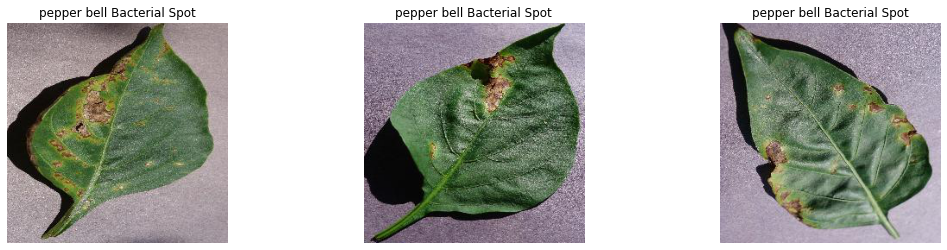

<Figure size 1080x720 with 0 Axes>

In [17]:
pepper_dir = "plantdisease/PlantVillage/Pepper__bell___Bacterial_spot"
pepper_path = os.listdir("plantdisease/PlantVillage/Pepper__bell___Bacterial_spot")
items_per_row = 3
title = "pepper bell Bacterial Spot"
print("\033[38;5;202mSample images of", title, "\033[0m")
plot_images_in_rows(pepper_dir, pepper_path, items_per_row)


Sample images of Tomato Bacterial spot 


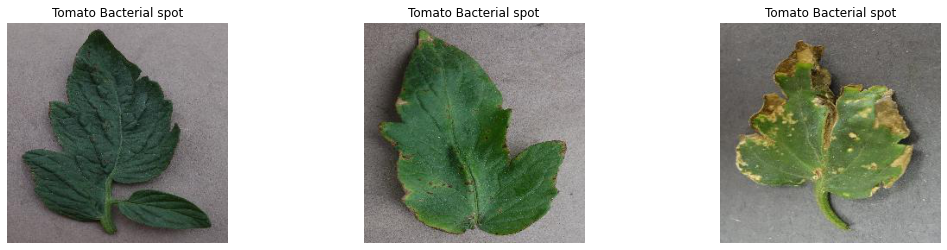

<Figure size 1080x720 with 0 Axes>

In [18]:
tomato_dir = "plantdisease/PlantVillage/Tomato_Bacterial_spot"
tomato_path = os.listdir("plantdisease/PlantVillage/Tomato_Bacterial_spot")
items_per_row = 3
title = "Tomato Bacterial spot"
print("\033[38;5;202mSample images of", title, "\033[0m")
plot_images_in_rows(tomato_dir, tomato_path, items_per_row)

Sample images of Potato Late blight 


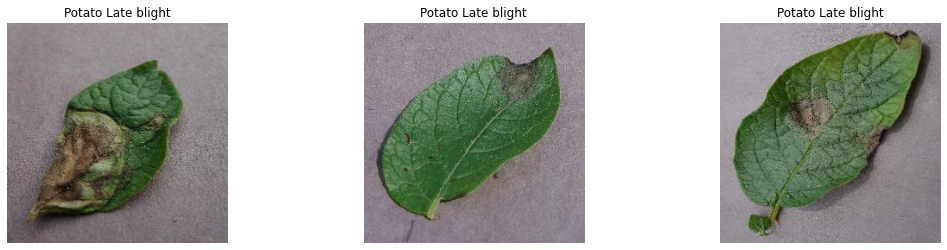

<Figure size 1080x720 with 0 Axes>

In [19]:
potato_dir = "plantdisease/PlantVillage/Potato___Late_blight"
potato_path = os.listdir("plantdisease/PlantVillage/Potato___Late_blight")
items_per_row = 3
title = "Potato Late blight"
print("\033[38;5;202mSample images of", title, "\033[0m")
plot_images_in_rows(potato_dir, potato_path, items_per_row)

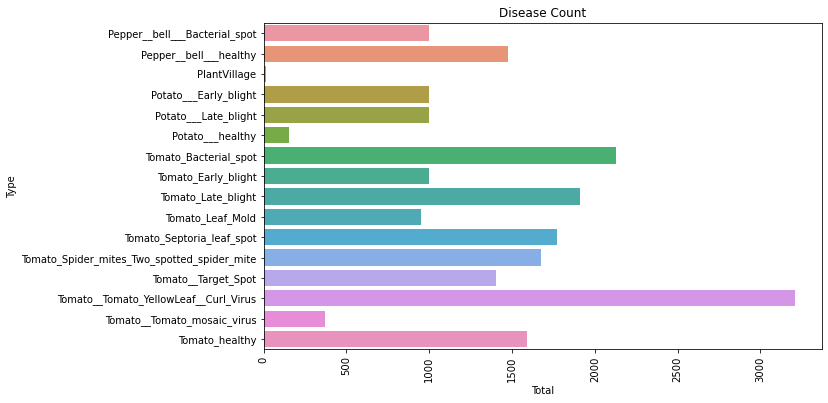

In [43]:

dataset = "./plantdisease/PlantVillage/"
folders = os.listdir(dataset)
folders.sort()

# Count no.of images w.r.t each disease
img_count = {}
for folder in folders:
    cnt = len(os.listdir(dataset + folder + os.sep))
    img_count[folder] = cnt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting barplots of no.of leaf images w.r.t each disease using seaborn
sns.barplot(x=list(img_count.values()), y=list(img_count.keys()))
plt.title('Disease Count')
plt.xlabel('Total')
plt.ylabel('Type')
plt.xticks(rotation='vertical')
plt.show()


## Preprocessing

In [32]:
# importing random library for random sampling
import random


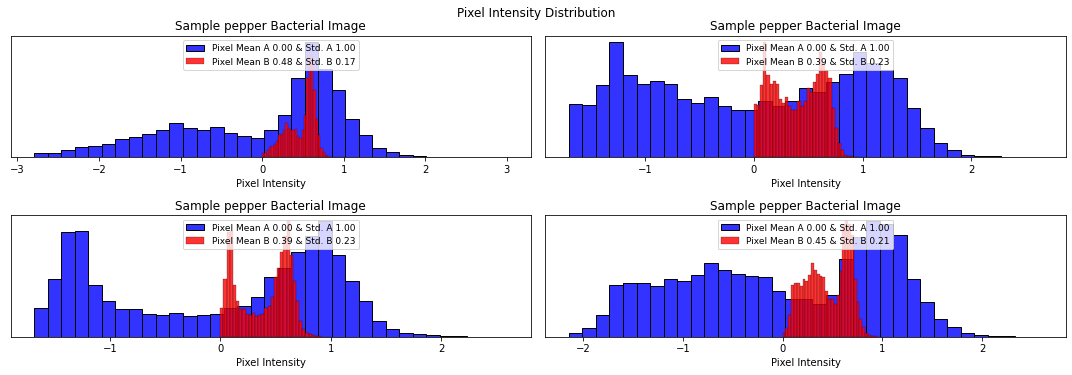

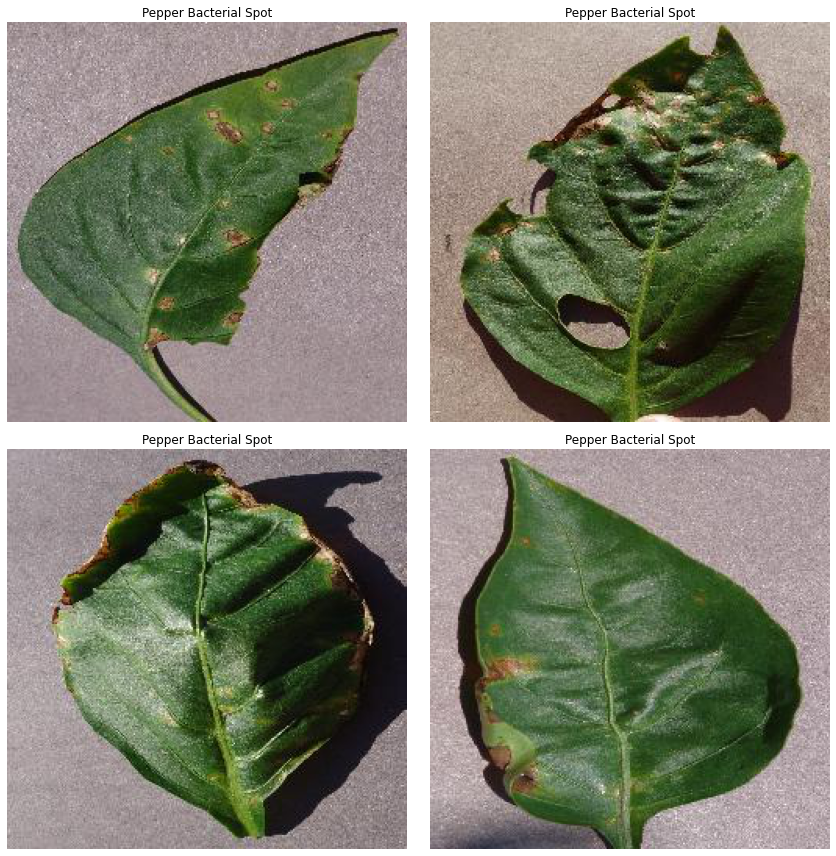

In [33]:
train_normal = os.listdir('plantdisease/PlantVillage/Pepper__bell___Bacterial_spot')
labels = ['pepper']

train_im_n_selected = random.sample(train_normal, 4)


fig = plt.figure(figsize=(15, 15))
count = 1
valid_files = []

for i, img in enumerate(train_im_n_selected):
    sample_path = os.path.join('plantdisease/PlantVillage/Pepper__bell___Bacterial_spot', img)
    if os.path.isfile(sample_path):
        valid_files.append(img)
        sample_img = Image.open(sample_path)
        sample_img = np.array(sample_img)
        sample_img = sample_img / 255.0
        sample_img_mean = np.mean(sample_img)
        sample_img_std = np.std(sample_img)
        new_sample_img = (sample_img - sample_img_mean) / sample_img_std
        ax = fig.add_subplot(6, 2, count, yticks=[])
        sns.histplot(new_sample_img.ravel(),
                     label=f'Pixel Mean A {np.mean(new_sample_img):.2f} & Std. A {np.std(new_sample_img):.2f}',
                     kde=False, color='blue', bins=35, alpha=0.8)
        sns.histplot(sample_img.ravel(),
                     label=f'Pixel Mean B {np.mean(sample_img):.2f} & Std. B {np.std(sample_img):.2f}',
                     kde=False, color='red', bins=35, alpha=0.8)
        plt.legend(loc='upper center', fontsize=9)
        plt.title("Sample pepper Bacterial Image")
        plt.xlabel('Pixel Intensity')
        plt.ylabel('# Pixels in Image')
        count += 1
    else:
        print(f"File not found: {sample_path}")

fig.suptitle('Pixel Intensity Distribution')
plt.tight_layout()
plt.show()

train_im_n_selected = valid_files

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.ravel()

for i, img in enumerate(train_im_n_selected):
    sample_path = os.path.join('plantdisease/PlantVillage/Pepper__bell___Bacterial_spot', img)
    sample_img = Image.open(sample_path)
    sample_img = np.array(sample_img)

    # Display the image in the corresponding subplot
    axes[i].imshow(sample_img, cmap='gray')
    axes[i].set_title('Pepper Bacterial Spot')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [34]:
# converting the list of images to a numpy array
image_array = []

for img_file in image_list:
    # Extract the pixel data from the JpegImageFile object
    img_data = np.array(img_file, dtype=np.float16)
    # Normalize the pixel values
    img_data = img_data / 225.0
    # Append the image data to the image_array
    image_array.append(img_data)

# Convert the image_array to a NumPy array
img_np_array = np.array(image_array)

In [35]:
# confirming the datatype of our image array
type(img_np_array)

numpy.ndarray

In [36]:
# splitting our data into the test and training set
print("...Spliting data to train and test sets...")
x_train, x_test, y_train, y_test = train_test_split(img_np_array, image_labels, test_size=0.2, random_state = 42) 

...Spliting data to train and test sets...


In [37]:
# setting and declaring the data augmentation parameters
aug = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode="nearest")

## Modelling

In [38]:
inputShape = (height, width, depth)

In [39]:
# CNN
# Training the model
# Initialize model and proceed by adding layers (Convolution, Normalization, Max Pooling, Dense) with 'relu' as the preferred activation function
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=1, padding='same', activation='relu', input_shape=inputShape))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=n_classes, activation='sigmoid'))
model.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])


In [40]:
# printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0

In [41]:
# importing Adam optimization algorithm
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
# train the network
print("[...training the network...")

[...training the network...


In [42]:
# declaring paremeters to be used for the learning rate reduction technic

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience = 2,
                                            verbose=1,
                                            factor=0.3,
                                            min_lr=0.000001)

In [29]:

#fitting the model
history = model.fit(aug.flow(x_train, y_train, batch_size = BS), 
                    epochs = EPOCHS,
                    validation_data = aug.flow(x_test, y_test),
                    callbacks = learning_rate_reduction)

Epoch 1/25
74/74 [==============================] - 601s 8s/step - loss: 0.5097 - accuracy: 0.2757 - val_loss: 0.3827 - val_accuracy: 0.0643
Epoch 2/25
74/74 [==============================] - 638s 9s/step - loss: 0.2477 - accuracy: 0.4257 - val_loss: 1.1119 - val_accuracy: 0.0914
Epoch 3/25
74/74 [==============================] - 607s 8s/step - loss: 0.2030 - accuracy: 0.5028 - val_loss: 1.3595 - val_accuracy: 0.0761
Epoch 4/25
74/74 [==============================] - 526s 7s/step - loss: 0.1718 - accuracy: 0.5680 - val_loss: 0.5461 - val_accuracy: 0.1049
Epoch 5/25
74/74 [==============================] - 593s 8s/step - loss: 0.1538 - accuracy: 0.5981 - val_loss: 0.4832 - val_accuracy: 0.1760
Epoch 6/25
74/74 [==============================] - 587s 8s/step - loss: 0.1388 - accuracy: 0.6379 - val_loss: 0.8821 - val_accuracy: 0.1218
Epoch 7/25
74/74 [==============================] - 588s 8s/step - loss: 0.1282 - accuracy: 0.6768 - val_loss: 0.3536 - val_accuracy: 0.2876
Epoch 8/25
74

In [30]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

19/19 [==============================] - 10s 538ms/step - loss: 0.1582 - accuracy: 0.7699
Loss of the model is -  0.15816698968410492
19/19 [==============================] - 11s 569ms/step - loss: 0.1582 - accuracy: 0.7699
Accuracy of the model is -  76.9881546497345 %


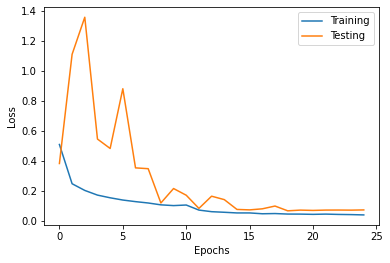

In [31]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Testing'])
plt.show()

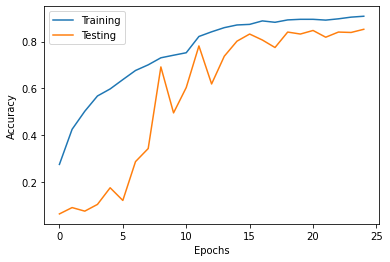

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Testing'])
plt.show()


In [33]:
model.save_weights('PlantDiseasePredictor')


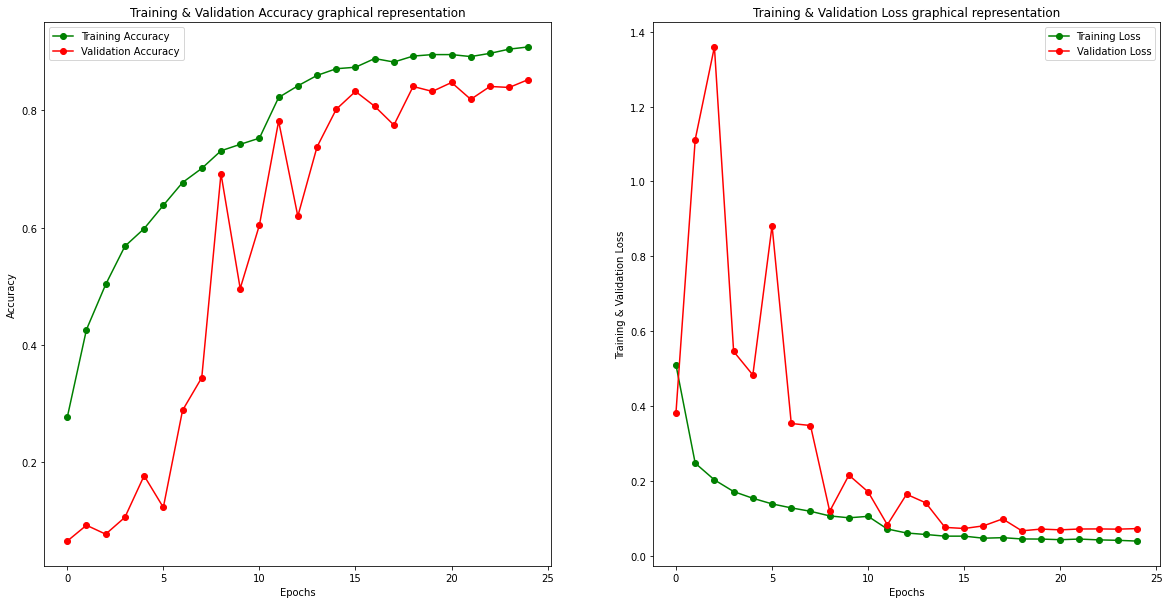

In [35]:
epochs = [i for i in range(25)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)
ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy graphical representation')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss graphical representation')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()


In [36]:
predictions = model.predict(x_test)
len(predictions)

591

In [37]:
labels = label_binarizer.classes_
labels

array(['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy',
       'Potato___Early_blight', 'Potato___Late_blight',
       'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight',
       'Tomato_Late_blight', 'Tomato_Leaf_Mold',
       'Tomato_Septoria_leaf_spot',
       'Tomato_Spider_mites_Two_spotted_spider_mite',
       'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus',
       'Tomato__Tomato_mosaic_virus', 'Tomato_healthy'], dtype='<U43')

In [38]:
len(y_test)

591

In [39]:
print(y_test.shape, predictions.shape)


(591, 15) (591, 15)


In [41]:
predictions = model.predict(x_test)
predictions = np.where(predictions > 0.5, 1, 0)

In [43]:
target_names = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']

print(classification_report(y_test,
                           predictions,
                           target_names = target_names))

                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       1.00      0.67      0.80        45
                     Pepper__bell___healthy       0.95      0.93      0.94        40
                      Potato___Early_blight       0.78      1.00      0.88        54
                       Potato___Late_blight       0.88      0.67      0.76        43
                           Potato___healthy       0.92      0.60      0.73        20
                      Tomato_Bacterial_spot       0.89      0.86      0.88        37
                        Tomato_Early_blight       0.95      0.46      0.62        41
                         Tomato_Late_blight       1.00      0.37      0.54        35
                           Tomato_Leaf_Mold       0.97      0.76      0.85        38
                  Tomato_Septoria_leaf_spot       0.68      0.52      0.59        33
Tomato_Spider_mites_Two_spotted_spider_mite       0.67      0.67

C:\Users\shadr\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
from sklearn.metrics import multilabel_confusion_matrix

mcm = multilabel_confusion_matrix(y_test, predictions)
for i in range(len(mcm)):
    print(f"Confusion matrix for class {i}:")
    print(mcm[i])
    print()

Confusion matrix for class 0:
[[546   0]
 [ 15  30]]

Confusion matrix for class 1:
[[549   2]
 [  3  37]]

Confusion matrix for class 2:
[[522  15]
 [  0  54]]

Confusion matrix for class 3:
[[544   4]
 [ 14  29]]

Confusion matrix for class 4:
[[570   1]
 [  8  12]]

Confusion matrix for class 5:
[[550   4]
 [  5  32]]

Confusion matrix for class 6:
[[549   1]
 [ 22  19]]

Confusion matrix for class 7:
[[556   0]
 [ 22  13]]

Confusion matrix for class 8:
[[552   1]
 [  9  29]]

Confusion matrix for class 9:
[[550   8]
 [ 16  17]]

Confusion matrix for class 10:
[[543  12]
 [ 12  24]]

Confusion matrix for class 11:
[[540   0]
 [ 40  11]]

Confusion matrix for class 12:
[[558   1]
 [  7  25]]

Confusion matrix for class 13:
[[552   0]
 [ 17  22]]

Confusion matrix for class 14:
[[513  31]
 [  0  47]]



In [47]:
## combining the confusion matrices into a single one
mcm = multilabel_confusion_matrix(y_test, predictions)
overall_cm = np.sum(mcm, axis=0)

print("Overall Confusion Matrix:")
print(overall_cm)

Overall Confusion Matrix:
[[8194   80]
 [ 190  401]]


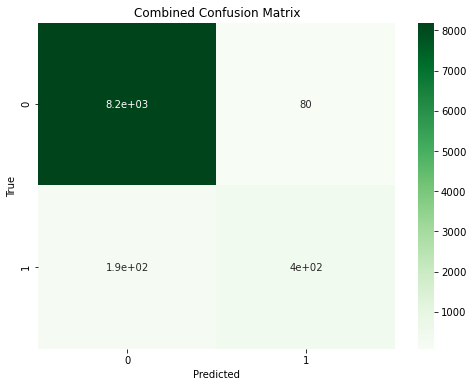

In [52]:
mcm = multilabel_confusion_matrix(y_test, predictions)
overall_cm = np.sum(mcm, axis=0)

labels = ['0', '1']  # Replace with your desired labels

plt.figure(figsize=(8, 6))
sns.heatmap(overall_cm, cmap='Greens', annot=True, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Combined Confusion Matrix')
plt.show()

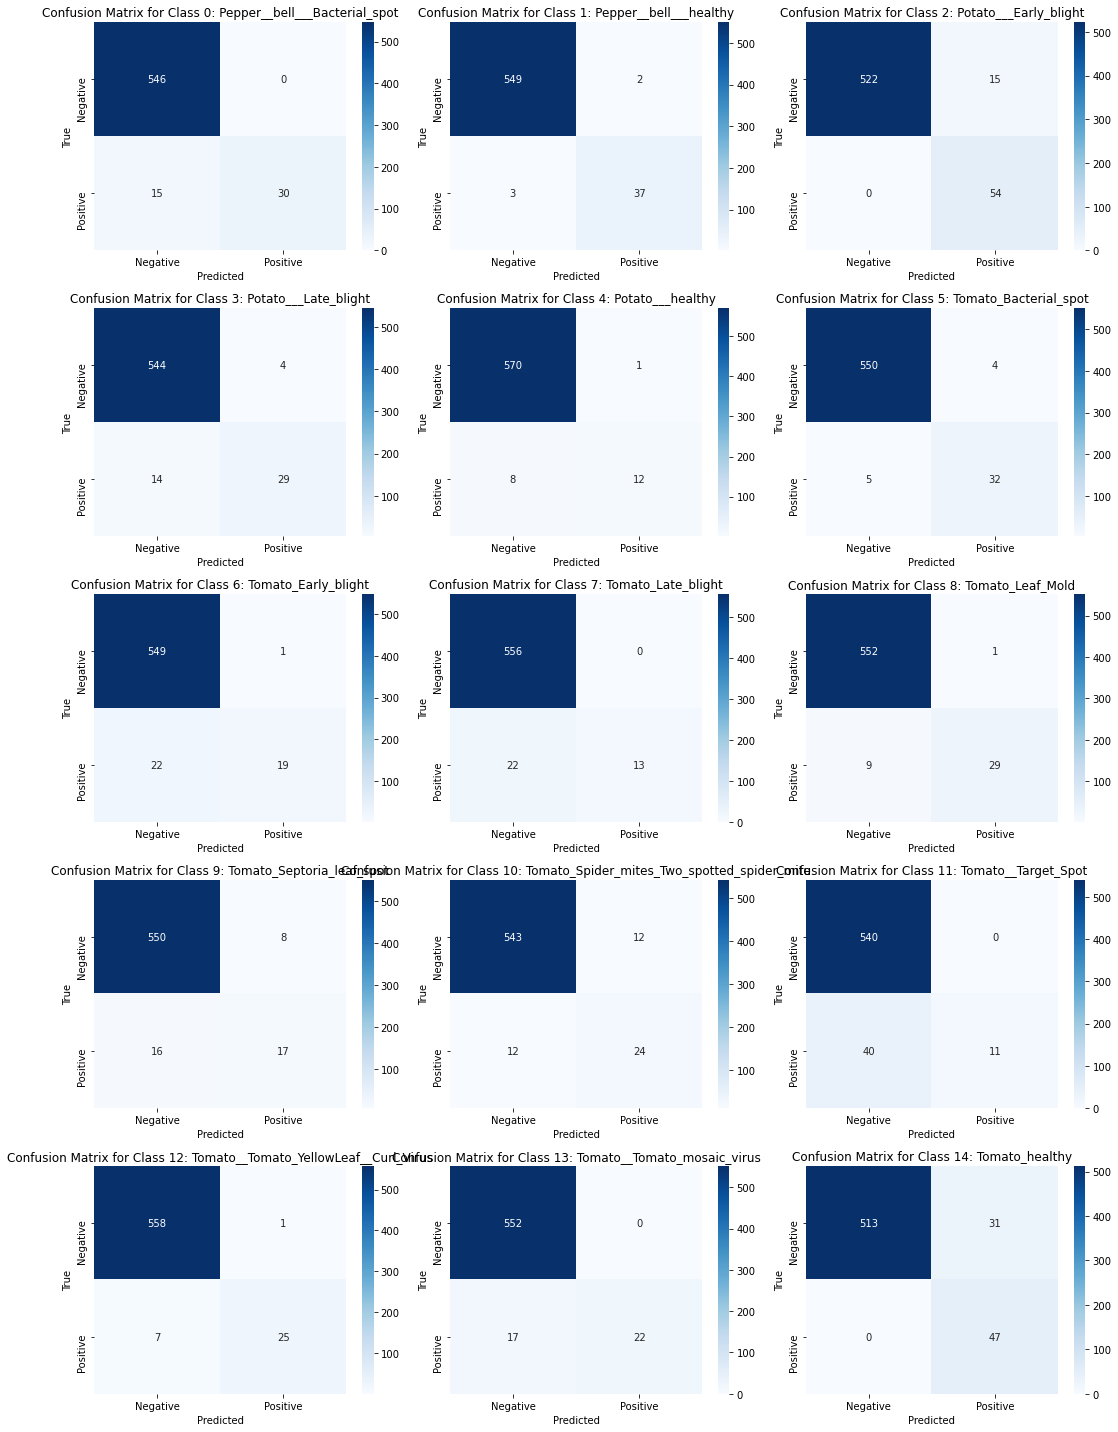

In [55]:
## confusion matrix for each set of class

mcm = multilabel_confusion_matrix(y_test, predictions)
labels = target_names  # Replace with your desired class labels

num_classes = len(mcm)
num_plots_per_row = 3
num_rows = (num_classes + num_plots_per_row - 1) // num_plots_per_row

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 4*num_rows))

for i, ax in enumerate(axes.flatten()):
    if i < num_classes:
        sns.heatmap(mcm[i], cmap='Blues', annot=True, fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=ax)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('True')
        ax.set_title(f'Confusion Matrix for Class {i}: {labels[i]}')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()


In [56]:
def plantdiseaseprediction(img):
    img = np.array(img)/255
    img = img.reshape(-1, 256, 256, 1)
    isUnhealthy = model.predict(img)[0]
    imgClass = "Healthy" if isPUnhealthy < 0.5 else "Affected"
    return imgClass

In [61]:
 
pr = model.predict(x_test)
pr = np.where(pr > 0.5, 1, 0)
for i in range(len(pr)):
    if np.greater(pr[i], 0.5).any():
        pr[i] = 1
    else:
        pr[i] = 0


In [62]:
import gradio as gr

In [63]:
img = gr.inputs.Image(shape = (256, 256))
label = gr.outputs.Label(num_top_classes = 1)

C:\Users\shadr\anaconda3\envs\learn-env\lib\site-packages\gradio\inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\shadr\anaconda3\envs\learn-env\lib\site-packages\gradio\inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
C:\Users\shadr\anaconda3\envs\learn-env\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\shadr\anaconda3\envs\learn-env\lib\site-packages\gradio\outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


In [ ]:
##

In [ ]:
# from sklearn.metrics import classification_report

# aug.fit(x_train)

# # Generate predictions on the augmented test set
# augmented_x_test = aug.flow(x_test, batch_size=len(x_test), shuffle=False)
# predictions = model.predict(augmented_x_test)

# # Convert raw predictions to binary labels
# predictions = (predictions > 0.5).astype(int)

# # Evaluate the model's performance
# report = classification_report(y_test, predictions)
# print(report)

In [ ]:
# from sklearn.metrics import classification_report

# aug.fit(x_train, y_train)

# # Generate predictions on the test set
# predictions = clf.predict(x_test)

# # Convert predictions to a numpy array and flatten it
# predictions = np.array(predictions)
# predictions = predictions.flatten()

# # Evaluate the model's performance
# report = classification_report(y_test, predictions)
# print(report)

In [ ]:

# sn = len(y_test)  # Get the length of y_test
# predictions = np.array(predictions)
# random_predictions = np.random.choice(predictions, size=sn)



In [ ]:

# # Generate random predictions
# sn = len(y_test)  # Get the length of y_test
# random_predictions = np.random.choice(predictions, size=len(y_test))

# target_names = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy',
#                 'Potato___Early_blight', 'Potato___Late_blight',
#                 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight',
#                 'Tomato_Late_blight', 'Tomato_Leaf_Mold',
#                 'Tomato_Septoria_leaf_spot',
#                 'Tomato_Spider_mites_Two_spotted_spider_mite',
#                 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus',
#                 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']

# # Evaluate the model's performance
# report = classification_report(y_test, random_predictions, target_names=target_names)
# print(report)


In [ ]:

# target_names = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy',
#                 'Potato___Early_blight', 'Potato___Late_blight',
#                 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight',
#                 'Tomato_Late_blight', 'Tomato_Leaf_Mold',
#                 'Tomato_Septoria_leaf_spot',
#                 'Tomato_Spider_mites_Two_spotted_spider_mite',
#                 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus',
#                 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']

# # Evaluate the model's performance
# report = classification_report(y_test, predictions, target_names=target_names)
# print(report)

In [ ]:
# cm = confusion_matrix(y_test, predictions)
# cm = pd.DataFrame(cm, index = ['0', '1'], columns = ['0', '1'])
# cm
